# Шаг 1. Изучим датасет, преобработаем данные 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats as st

In [2]:
data = pd.read_csv ('/datasets/games.csv')

In [3]:
data.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.set_axis(['name', 'platform', 'year', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'], axis='columns', inplace=True)

In [6]:
data.duplicated().sum()

0

### Name — название игры

In [7]:
data.query('name.isnull()')

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


#### Замеченные проблемы
- имеем две игры без названий, предлагаю удалить найденные строки, т.к. потеря никак не исказит данные

In [8]:
data.dropna(subset = ['name'], inplace = True)

### Platform — платформа

In [9]:
data['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

In [10]:
data['platform'].isna().sum()

0

#### Замеченные проблемы
- данные корректны, проблем нет

### Year - год релиза игры

In [11]:
data['year'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: year, dtype: int64

In [12]:
data.query('year.isnull()')

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


#### Замеченные проблемы
- столбец имеет формат float64, для удобства работы переведем его в к типу int64
- пропущенные даты выпуска (269 значений, что составляет всего 1,6%) предлагаю удалить, так как их отсутствие не исказит выводы.

In [13]:
data.dropna(subset = ['year'], inplace = True)

In [14]:
data['year'] = data['year'].astype("int64")

### Genre — жанр игры

In [15]:
data['genre'].value_counts()

Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64

#### Замеченные проблемы
- пропущенные строки удалены в ходе работы со столбцом name.

### NA_sales - продажи в Северной Америке (миллионы долларов)

In [16]:
data['na_sales'].isnull().sum()

0

In [17]:
data.query('na_sales == 0')

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
215,Monster Hunter Freedom 3,PSP,2010,Role-Playing,0.0,0.00,4.87,0.00,NaN,NaN,NaN
340,Friend Collection,DS,2009,Misc,0.0,0.00,3.67,0.00,NaN,NaN,NaN
385,Monster Hunter 4,3DS,2013,Role-Playing,0.0,0.00,3.44,0.00,NaN,NaN,NaN
403,English Training: Have Fun Improving Your Skills!,DS,2006,Misc,0.0,0.99,2.32,0.02,NaN,NaN,NaN
428,Dragon Quest VI: Maboroshi no Daichi,SNES,1995,Role-Playing,0.0,0.00,3.19,0.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.0,0.00,0.00,0.00,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.0,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.0,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.0,0.00,0.01,0.00,NaN,NaN,NaN


#### Замеченные проблемы
- нулевые значения продаж характеризуют специфический продукт, не продававшийся в данном регионе. Тип float подходит для хранящихся в столбце данных. Предобработки не требует

### EU_sales — продажи в Европе (миллионы долларов)

In [18]:
data.query('eu_sales == 0')

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
148,Final Fantasy XII,PS2,2006,Role-Playing,1.88,0.0,2.33,1.74,92.0,7.6,T
215,Monster Hunter Freedom 3,PSP,2010,Role-Playing,0.00,0.0,4.87,0.00,NaN,NaN,NaN
268,Metal Gear Solid 3: Snake Eater,PS2,2004,Action,1.46,0.0,0.83,1.93,91.0,9.3,M
284,Half-Life,PC,1997,Shooter,4.03,0.0,0.09,0.00,96.0,9.1,M
316,Dragon Warrior III,NES,1988,Role-Playing,0.10,0.0,3.77,0.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.0,0.00,0.00,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.0,0.01,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.0,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.0,0.00,0.00,NaN,NaN,NaN


#### Замеченные проблемы
- нулевые значения продаж характеризуют специфический продукт, не продававшийся в данном регионе. Тип float подходит для хранящихся в столбце данных. Предобработки не требует

### JP_sales — продажи в Японии (миллионы долларов)


In [19]:
data.query('jp_sales == 0')

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
61,Just Dance 3,Wii,2011,Misc,5.95,3.11,0.0,1.06,74.0,7.8,E10+
85,The Sims 3,PC,2009,Simulation,0.99,6.42,0.0,0.60,86.0,7.6,T
89,Pac-Man,2600,1982,Puzzle,7.28,0.45,0.0,0.08,NaN,NaN,NaN
100,Call of Duty: World at War,X360,2008,Shooter,4.81,1.88,0.0,0.69,84.0,7.6,M
103,Just Dance,Wii,2009,Misc,3.48,2.99,0.0,0.73,49.0,8,E10+
...,...,...,...,...,...,...,...,...,...,...,...
16706,Men in Black II: Alien Escape,GC,2003,Shooter,0.01,0.00,0.0,0.00,NaN,tbd,T
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.0,0.00,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.0,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.0,0.00,NaN,NaN,NaN


#### Замеченные проблемы
- нулевые значения продаж характеризуют специфический продукт, не продававшийся в данном регионе. Предобработки не требует

### Other_sales — продажи в других странах (миллионы долларов)


In [20]:
data.query('other_sales == 0')

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
138,World of Warcraft,PC,2004,Role-Playing,0.08,6.21,0.00,0.0,93.0,7.3,T
215,Monster Hunter Freedom 3,PSP,2010,Role-Playing,0.00,0.00,4.87,0.0,NaN,NaN,NaN
284,Half-Life,PC,1997,Shooter,4.03,0.00,0.09,0.0,96.0,9.1,M
288,World of Warcraft: The Burning Crusade,PC,2007,Role-Playing,2.57,1.52,0.00,0.0,91.0,7.9,T
316,Dragon Warrior III,NES,1988,Role-Playing,0.10,0.00,3.77,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN


#### Замеченные проблемы
- нулевые значения продаж характеризуют специфический продукт, не продававшийся в данном регионе. Тип float подходит для хранящихся в столбце данных. Предобработки не требует

### Critic_Score — оценка критиков (максимум 100)


In [21]:
data.query('critic_score == "tbd"')

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [22]:
data['critic_score'].value_counts()

70.0    252
71.0    248
75.0    240
80.0    235
73.0    234
       ... 
29.0      3
20.0      3
21.0      1
13.0      1
17.0      1
Name: critic_score, Length: 81, dtype: int64

In [23]:
data.query('critic_score.isnull()')

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


#### Замеченные проблемы
- столбец имеет тип float64, хотя имеет стобальную систему оценки и, соответственно, оценка выставляется целыми баллами - приведем его к типу int64
- имеем 8678 пропущенных значений как для старых и 'редких' игр, так и для новых и вполне финансово успешных. Результатом появления пропусков может оказаться проблема при выгрузке данных.
- пропуски предлагаю заполнить нулями, т.к. для нашего дальнейшего исследования они не значимы. А когда дойдем до работы с рейтингами, сделаем срез без нулевых значений и проанализируем оставшиеся.

In [24]:
data['critic_score'] = data['critic_score'].fillna(0)

In [25]:
data['critic_score'] = data['critic_score'].astype('int64')

### User_Score — оценка пользователей (максимум 10)


In [26]:
data.query('user_score == "tbd"')

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,0,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,0,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,0,tbd,E


In [27]:
data.query('user_score.value_counts().max()')

name            Crimson Skies: High Road to Revenge
platform                                         XB
year                                           2003
genre                                    Simulation
na_sales                                       0.65
eu_sales                                       0.19
jp_sales                                          0
other_sales                                    0.03
critic_score                                     88
user_score                                      8.8
rating                                            T
Name: 2376, dtype: object

In [28]:
data.query('user_score.isnull()')

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0,NaN,NaN


#### Замеченные проблемы
- столбец имеет тип float64 и имеет десятибальную систему оценки с выставлением до десятой доли балла. Оставляем тип как есть
- результатом появления пропусков может оказаться проблема при выгрузке данных.  
> ".... Буквы tba означают to be announced. Перевод простой — «будет объявлено дополнительно». Из этой же категории еще две аббревиатуры — tbc (to be confirmed) и tbd (to be determined). Перевод, соответственно, такой: «будет утверждено» и «будет определено». Хотя с tbd следует быть внимательнее. У этого сокращения есть еще два значения, поэтому определить, какое из них имелось в виду, можно только из контекста. А значения такие: to be discussed («выносится на обсуждение») и to be done («должно быть сделано»)....." 
https://fakty.ua/179623-chto-oznachayut-naibolee-rasprostranennye-abbreviatury-v-delovoj-elektronnoj-perepiske
- из этого делаем вывод, что оценки данных игр должны були быть объявлены позже, но почему то так и не появились. Считаю их аналогичными пропущенным значениям. предобработку проведем как в предыдущем пункте

In [29]:
data['user_score'] = data['user_score'].fillna(0)

In [30]:
data['user_score'].replace('tbd', '0', inplace=True)

In [31]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='raise' )

### Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [32]:
data.query('rating == "tbd"')

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [33]:
data['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

#### Замеченные проблемы
- результатом появления пропусков может оказаться проблема при выгрузке данных. Обработку произведем аналогично предыдущим случаям.

In [34]:
data['rating'] = data['rating'].fillna(0)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name            16444 non-null object
platform        16444 non-null object
year            16444 non-null int64
genre           16444 non-null object
na_sales        16444 non-null float64
eu_sales        16444 non-null float64
jp_sales        16444 non-null float64
other_sales     16444 non-null float64
critic_score    16444 non-null int64
user_score      16444 non-null float64
rating          16444 non-null object
dtypes: float64(5), int64(2), object(4)
memory usage: 2.1+ MB


#### Вывод:  
На данном этапе предобработку считаю оконченой. Заменять пропущенные значения медианами/средними считаю в корне не правильным, т.к. велика вероятность очень сильно исказить данные и в дальнейшем прийти к неверным выводам, строя метрики. Удалять такое количество пропусков тоже нельзя, т.к. они, местами, составляют ~ половину датафрейма, поэтому для дальнейшего анализа будем использовать срезы по интересующим нас колонкам.

# Шаг 2. Исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы

In [36]:
on_year = data.groupby(by='year')['name'].count()

In [37]:
on_year = on_year.reset_index(level='year')

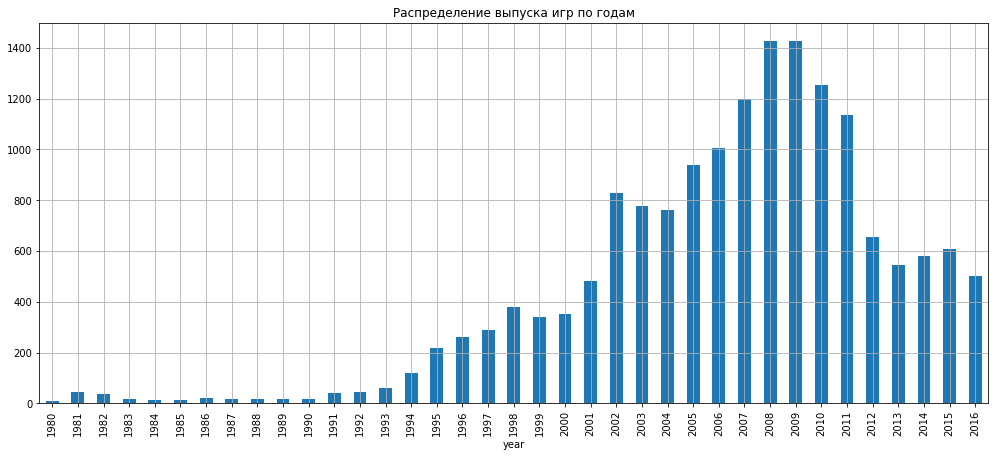

In [38]:
on_year.plot(kind='bar', x='year', y='name', grid=True, figsize=(17,7), title='Распределение выпуска игр по годам', legend=False)

#### Из графика видно, что пиком игровой индустрии стали 2008-2009 года, после чего рынок пошел на спад.

### Посмотрим как менялись продажи по платформам

In [39]:
data['all_sale'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [40]:
sales_top = data.groupby(by='platform')['all_sale'].sum().sort_values(ascending=False)
sales_top

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: all_sale, dtype: float64

##### Из таблицы выше видно, что большим отрывом лидирует консоль PS2, со 2 по 5 места конкуренция намного выше и отрыв между позициями небольшой.  
#### Посмотрим распределение по годам на примере 5 самых популярных консолей



In [41]:
ps2 = data.query('platform == "PS2"')

In [42]:
ps2_y = ps2.groupby(by='year')['all_sale'].sum()

In [43]:
x360 = data.query('platform == "X360"')

In [44]:
x360_y = x360.groupby(by='year')['all_sale'].sum()

In [45]:
ps3 = data.query('platform == "PS3"')

In [46]:
ps3_y = ps3.groupby(by='year')['all_sale'].sum()

In [47]:
wii = data.query('platform == "Wii"')

In [48]:
wii_y = wii.groupby(by='year')['all_sale'].sum()

In [49]:
ds = data.query('platform == "DS"')

In [50]:
ds_y = ds.groupby(by='year')['all_sale'].sum()

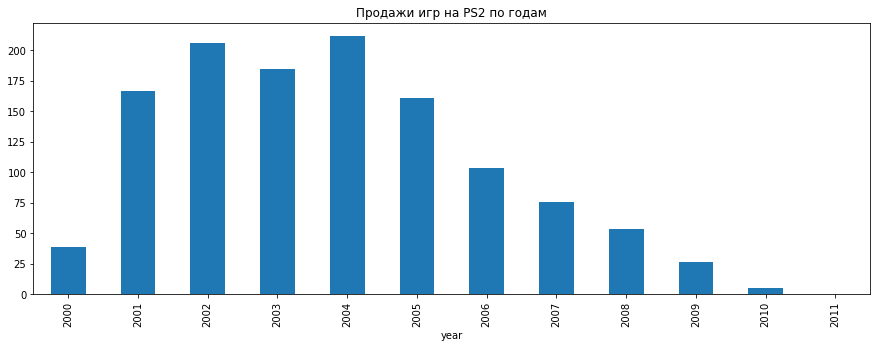

In [51]:
ps2_y.plot(kind='bar', figsize=(15,5), title='Продажи игр на PS2 по годам')

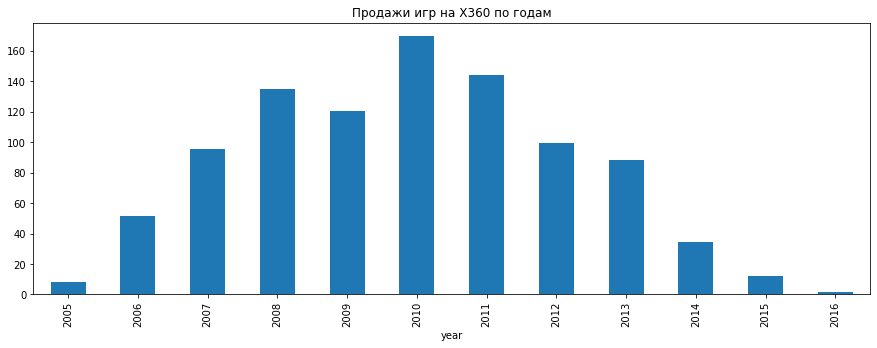

In [52]:
x360_y.plot(kind='bar', figsize=(15,5), title='Продажи игр на X360 по годам')

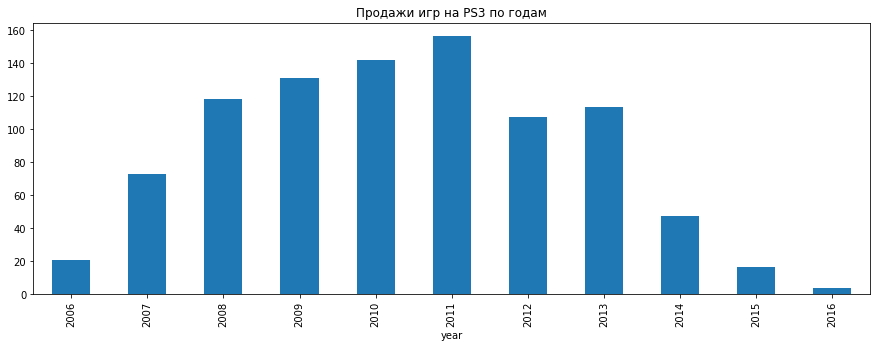

In [53]:
ps3_y.plot(kind='bar', figsize=(15,5), title='Продажи игр на PS3 по годам')

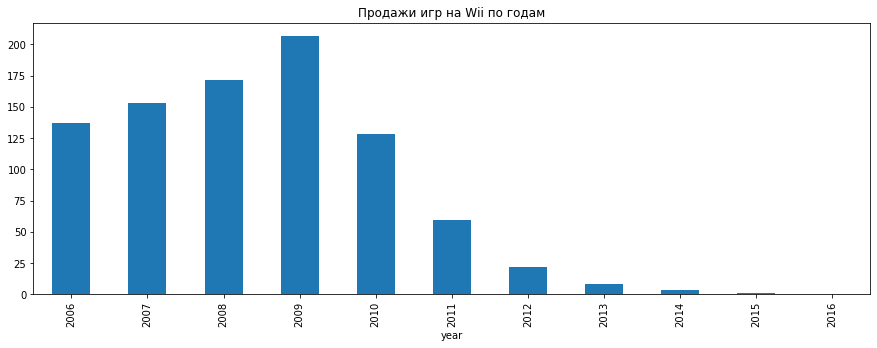

In [54]:
wii_y.plot(kind='bar', figsize=(15,5), title='Продажи игр на Wii по годам')

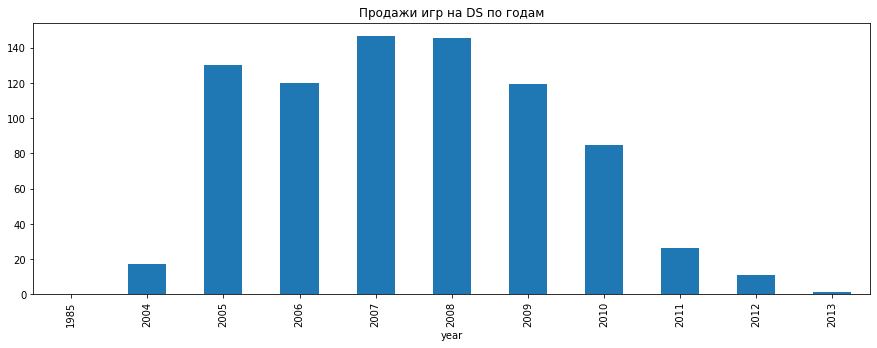

In [55]:
ds_y.plot(kind='bar', figsize=(15,5), title='Продажи игр на DS по годам')

#### изучив графики выше можно сделать предположение, основываясь на выборке из 5 самых популярных консолей, что средний срок жизни консоли составляет около 7 лет (от 6 до 9)  
#### Значит и актуальным периодом будем считать средний срок жизни консолей и для нашего прогноза будем учитывать данные с 2009 г.  

### Возьмем данные за актуальный период (с 2009 г.) и посмотрим на распределение продаж по платформам, чтобы определить наиболее перспективную

In [56]:
actdata = data.query('year >= 2009')

In [57]:
actplatform = actdata.groupby(by=['year', 'platform'])['name'].count()

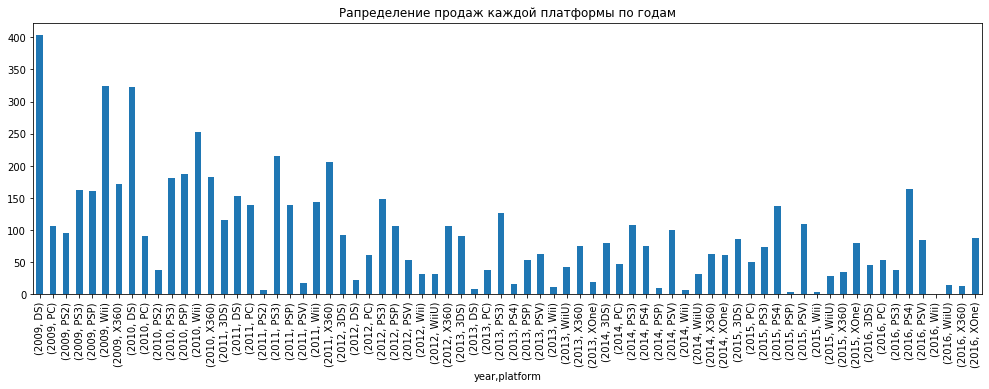

In [58]:
actplatform.plot(kind='bar',x='platform', y='name' ,figsize=(17,5), title='Рапределение продаж каждой платформы по годам')

#### Из графика выше видно, что в последние годы стабильно хорошие продажи у консолей PS4, XOne, PSV. Консоль PS4 идет в рост с заметным отрывом от конкурентов. Из этого можно сделать вывод, что наиболее актуальной в 2017 году будет именно PS4.

###  Построим boxplot по глобальным продажам каждой игры и разбивкой по платформам. 

In [59]:
actdata.head()

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sale
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61,6.3,E,21.82
15,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80,7.4,E,21.80
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05


In [60]:
box = actdata.groupby(by=['name','platform'])['all_sale'].sum()

In [61]:
box = box.reset_index()

In [62]:
box = box.query('all_sale < 1.5')

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


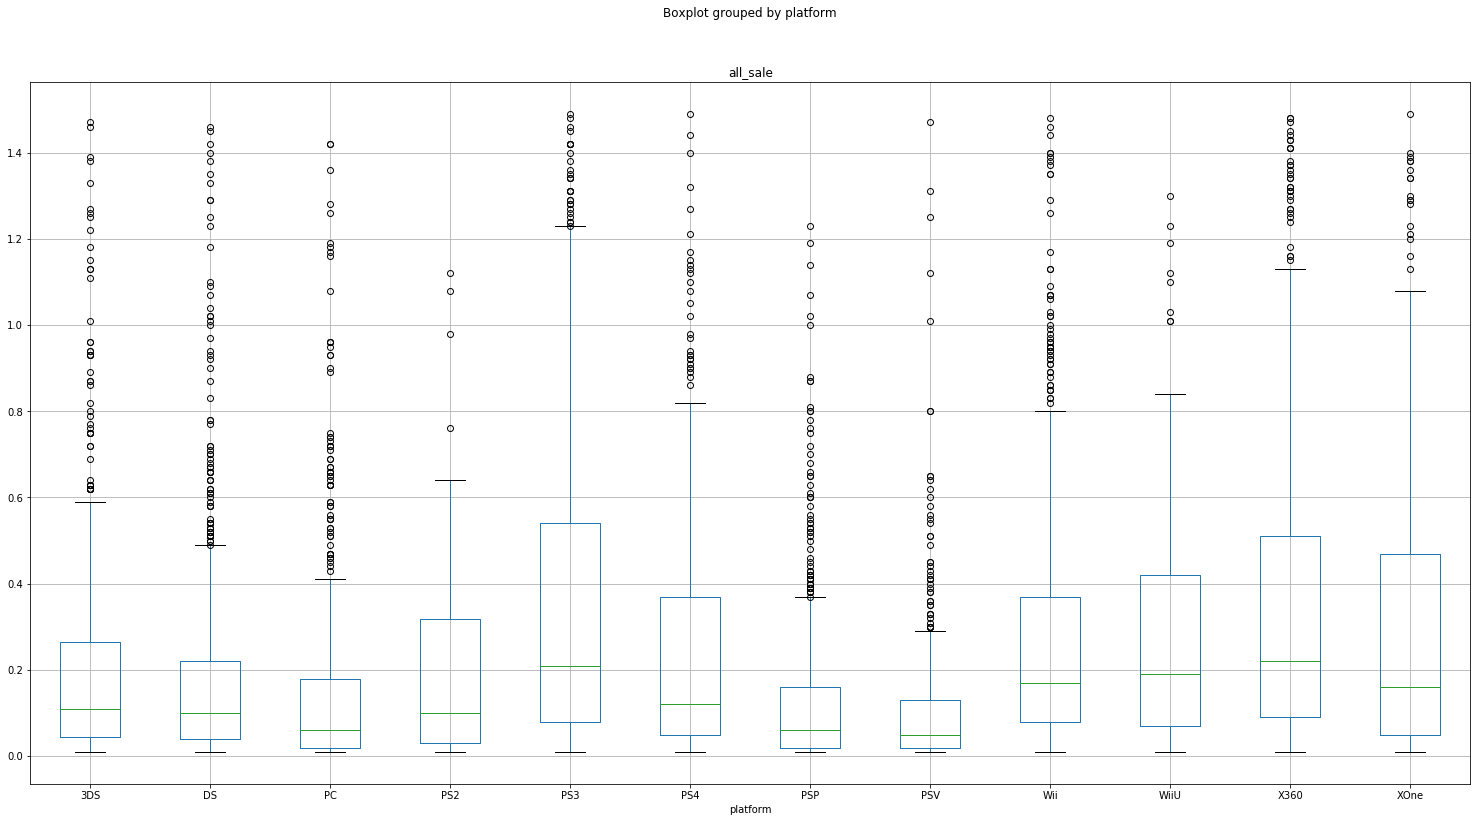

In [63]:
box.boxplot(by='platform', column='all_sale', figsize=(25,13))

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

In [64]:
ps4_score = actdata.query('platform == "PS4" and critic_score != 0 and user_score != 0')

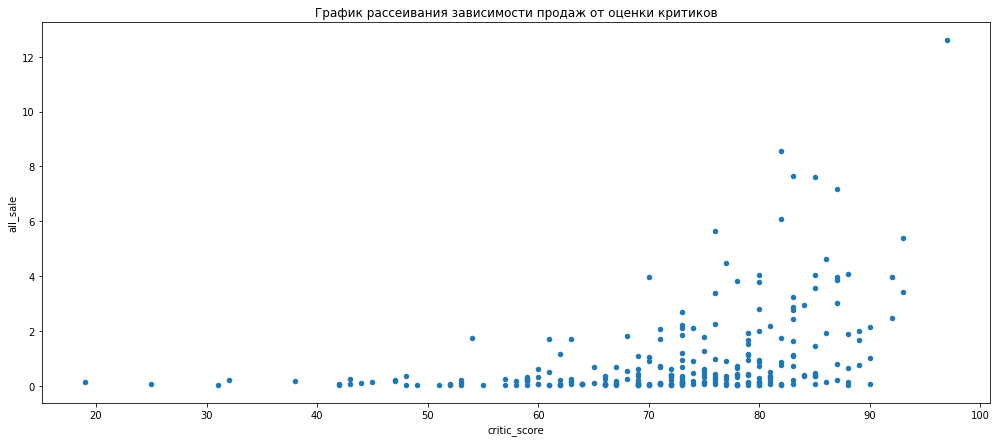

In [65]:
ps4_score.plot(x='critic_score', y='all_sale', kind='scatter', figsize=(17,7), title='График рассеивания зависимости продаж от оценки критиков')

#### Как видно из графиков выше, количество продаж зависит от оценок критиков. Так игры с оценками выше 70 баллов имеют самые высокие продажи, в отличае от игр, чьи оценки ниже 70.

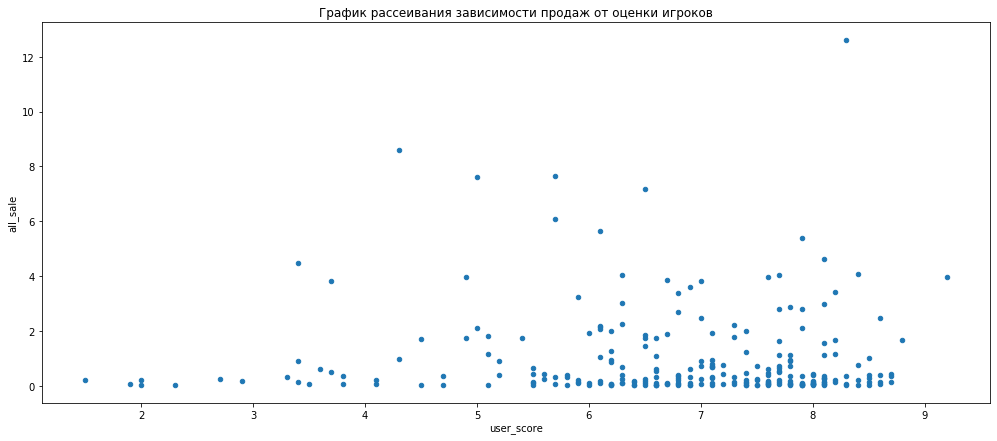

In [66]:
ps4_score.plot(x='user_score', y='all_sale', kind='scatter', figsize=(17,7), title='График рассеивания зависимости продаж от оценки игроков')

#### В тоже время зависимость продаж от оценок игроков много ниже, чем от авторитетных изданий, так даже у игр с оценками игроков выше 6 не означают безусловный успех проекта, хотя и доля продаж все равно выше, чем у низкооцененных проектов.

In [67]:
print("Корреляция между отзывами критиков и продажами", ps4_score['critic_score'].corr(ps4_score['all_sale']))
print("Корреляция между отзывами игроков и продажами", ps4_score['user_score'].corr(ps4_score['all_sale']))

Корреляция между отзывами критиков и продажами 0.40589480145836687
Корреляция между отзывами игроков и продажами -0.03362497596528878


#### Как видим высчитаная корреляция от отзывов критиков 0.4, что является достаточно малым значением и о сильной линейной зависимости между величинами говорить не приходится.  
#### Кореляция между отзывами игроков и продажами вообще составляет 0.034, что говорит о практически полном отсутствии линейной зависимости

### Попробуем расчитать корреляции для тех же величин но у других платформ, находящихся в нашем топ-5

In [68]:
ps2_corr = actdata.query('platform == "PS2" and critic_score != 0 and user_score != 0')
ps3_corr = actdata.query('platform == "PS3" and critic_score != 0 and user_score != 0')
x360_corr = actdata.query('platform == "X360" and critic_score != 0 and user_score != 0')
wii_corr = actdata.query('platform == "Wii" and critic_score != 0 and user_score != 0')
ds_corr = actdata.query('platform == "DS" and critic_score != 0 and user_score != 0')

In [69]:
print("Корреляция между отзывами критиков и продажами PS2", ps2_corr['critic_score'].corr(ps2_corr['all_sale']))
print("Корреляция между отзывами игроков и продажами PS2", ps2_corr['user_score'].corr(ps2_corr['all_sale']))

Корреляция между отзывами критиков и продажами PS2 0.41139690438711246
Корреляция между отзывами игроков и продажами PS2 -0.07499620818470916


In [70]:
print("Корреляция между отзывами критиков и продажами PS3", ps3_corr['critic_score'].corr(ps3_corr['all_sale']))
print("Корреляция между отзывами игроков и продажами PS3", ps3_corr['user_score'].corr(ps3_corr['all_sale']))

Корреляция между отзывами критиков и продажами PS3 0.41137202770699344
Корреляция между отзывами игроков и продажами PS3 0.10986211279449132


In [71]:
print("Корреляция между отзывами критиков и продажами X360", x360_corr['critic_score'].corr(x360_corr['all_sale']))
print("Корреляция между отзывами игроков и продажами X360", x360_corr['user_score'].corr(x360_corr['all_sale']))

Корреляция между отзывами критиков и продажами X360 0.36099058816218116
Корреляция между отзывами игроков и продажами X360 0.07418632343290807


In [72]:
print("Корреляция между отзывами критиков и продажами Wii", wii_corr['critic_score'].corr(wii_corr['all_sale']))
print("Корреляция между отзывами игроков и продажами Wii", wii_corr['user_score'].corr(wii_corr['all_sale']))

Корреляция между отзывами критиков и продажами Wii 0.20017035901987854
Корреляция между отзывами игроков и продажами Wii 0.1252110213823334


In [73]:
print("Корреляция между отзывами критиков и продажами DS", ds_corr['critic_score'].corr(ds_corr['all_sale']))
print("Корреляция между отзывами игроков и продажами DS", ds_corr['user_score'].corr(ds_corr['all_sale']))

Корреляция между отзывами критиков и продажами DS 0.33052273208805955
Корреляция между отзывами игроков и продажами DS 0.2325760882871847


#### Из расчетов видно, что в основном закономерность выведенная до этого сохраняется, исключения составляют две платформы Wii и DS, где зависимости между оценками людей, критиков и продажами близки друг к другу, но все равно являются крайне малозависимыми величинами. Возможно сказывается направленность консолей (Wii - консоль для активных игроков с уникальным взаимодействием, поэтому игры, низко оцененные критиками могли нравиться людям, а DS - консоль портативная, соответственно использующаяся для 'коротания' времени и игроки на ней менее превередливы, чем на старших консолях.

### Посмотрим на общее распределение игр по жанрам

In [74]:
genresale = actdata.groupby(by=['genre'])['all_sale'].sum()

In [75]:
genresale = genresale.sort_values()

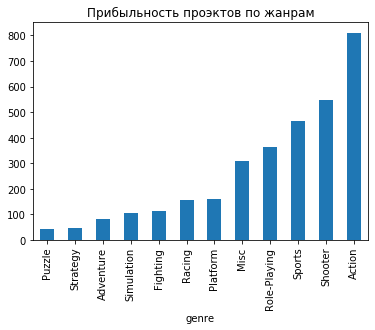

In [76]:
genresale.plot(kind='bar', title='Прибыльность проэктов по жанрам')

In [77]:
genresale

genre
Puzzle           40.39
Strategy         48.13
Adventure        81.23
Simulation      104.67
Fighting        113.49
Racing          156.37
Platform        160.25
Misc            310.37
Role-Playing    362.59
Sports          465.76
Shooter         549.03
Action          810.78
Name: all_sale, dtype: float64

#### Как видно из графика выше, самыми прибыльными являются игры жанра  Action (810.78 млн.долл.) за актуальный период. Вторым по прибыльности является Shooter (549.03 млн.долл.). Самые же не прибыльные проекты относятся к жанрам Strategy (48.13 млн.долл.) и Puzzle (40.39 млн.долл.), что обусловлено высоким порогом вхождения и количеством необходимого времени, чтобы пройти игру.

# Шаг 3. Составим портрет пользователя каждого региона

### Самые популярные платформы

In [78]:
na = actdata.groupby(by='platform')['na_sales'].sum()

In [79]:
na.sort_values(ascending=False)

platform
X360    408.18
PS3     291.90
Wii     235.75
DS      120.61
PS4     108.74
XOne     93.12
3DS      82.65
PC       40.49
WiiU     38.10
PSP      22.27
PSV      12.47
PS2      11.68
Name: na_sales, dtype: float64

In [80]:
eu = actdata.groupby(by='platform')['eu_sales'].sum()

In [81]:
eu.sort_values(ascending=False)

platform
PS3     255.00
X360    196.72
PS4     141.09
Wii     124.22
PC       82.32
3DS      61.27
DS       53.89
XOne     51.59
WiiU     25.13
PSP      18.24
PSV      13.07
PS2       6.61
Name: eu_sales, dtype: float64

In [82]:
jp = actdata.groupby(by='platform')['jp_sales'].sum()

In [83]:
jp.sort_values(ascending=False)

platform
3DS     100.62
PS3      68.29
DS       52.11
PSP      50.39
Wii      34.32
PSV      21.84
PS4      15.96
WiiU     13.01
X360      7.41
PS2       2.74
XOne      0.34
PC        0.00
Name: jp_sales, dtype: float64

#### В разных регионах доминируют различные платформы, что видно из продаж игр в регионах.   
#### Количество потребляемых товаров так же сильно разнится между регионами:
- так в NA доминирует приставка X360 с прибылью в 408.18 млн.долларов
- в EU доминирует приставка PS3 с прибылью в 255 млн.долларов
- в JP  доминирует приставка 3DS с прибылью в 100.62 млн.долларов

### Самые популярные жанры

In [84]:
na_g = actdata.groupby(by='genre')['na_sales'].sum()

In [85]:
na_g.sort_values(ascending=False)

genre
Action          361.72
Shooter         276.37
Sports          227.66
Misc            164.40
Role-Playing    130.83
Platform         74.93
Racing           61.04
Fighting         56.56
Simulation       43.74
Adventure        30.69
Puzzle           20.19
Strategy         17.83
Name: na_sales, dtype: float64

In [86]:
eu_g = actdata.groupby(by='genre')['eu_sales'].sum()

In [87]:
eu_g.sort_values(ascending=False)

genre
Action          271.91
Shooter         192.30
Sports          158.51
Misc             86.27
Role-Playing     83.56
Racing           67.63
Platform         49.68
Simulation       37.90
Fighting         27.74
Adventure        24.32
Strategy         17.31
Puzzle           12.02
Name: eu_sales, dtype: float64

In [88]:
jp_g = actdata.groupby(by='genre')['jp_sales'].sum()

In [89]:
jp_g.sort_values(ascending=False)

genre
Role-Playing    120.61
Action           84.16
Misc             30.09
Sports           25.32
Platform         20.65
Adventure        19.02
Fighting         16.92
Shooter          15.16
Simulation       14.25
Strategy          8.62
Racing            7.18
Puzzle            5.05
Name: jp_sales, dtype: float64

#### Распределение жанров весьма предскзуемо, в NA и EU распределение идентично, разниа лишь в количестве потребления. В топ-5 ожидаемо входят Action, Shooter, Sports, Misc и Role-Playing. В JP же лидируют игры жанра Role-Playing, Action, Misc, Sport, Platform - те жанры, в которые очень удобно играть по дороге на работу и с работы на портативной консоле.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [90]:
actdata

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sale
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61,6.3,E,21.82
15,Wii Fit Plus,Wii,2009,Sports,9.01,8.49,2.53,1.77,80,7.4,E,21.80
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
...,...,...,...,...,...,...,...,...,...,...,...,...
16705,15 Days,PC,2009,Adventure,0.00,0.01,0.00,0.00,63,5.8,0,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,0,0.0,0,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0,0.0,0,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0,0.0,0,0.01


In [91]:
ratingdata = actdata.query('rating != 0')

In [92]:
ratingdata_na = ratingdata.groupby(by='rating')['na_sales'].sum()

In [93]:
ratingdata_eu = ratingdata.groupby(by='rating')['eu_sales'].sum()

In [94]:
ratingdata_jp = ratingdata.groupby(by='rating')['jp_sales'].sum()

In [95]:
ratingdata_na.sort_values(ascending=False)

rating
M       440.86
E       403.16
T       227.11
E10+    202.94
EC        1.32
RP        0.00
Name: na_sales, dtype: float64

In [96]:
ratingdata_eu.sort_values(ascending=False)

rating
M       326.50
E       261.50
T       153.28
E10+    121.63
RP        0.03
EC        0.00
Name: eu_sales, dtype: float64

In [97]:
ratingdata_jp.sort_values(ascending=False)

rating
E       61.49
T       50.59
M       35.63
E10+    20.82
RP       0.00
EC       0.00
Name: jp_sales, dtype: float64

#### Как видно, в двух из трех представленных регионах возрастной рейтинг распределяется одинакого, исключение вновь составляет JP, где игры с рейтингом M занимают лишь третье место. Можно предположить что влияние рейтинга ESRB на продажи в конкретном регионе крайне мало и что игры с рейтингом М продаются лучше, чем другие

# Шаг 4. Проверим гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [98]:
alpha = 0.05

In [99]:
xo = actdata.query('platform == "XOne"')

In [100]:
pc = actdata.query('platform == "PC"')

In [101]:
results = st.ttest_ind(xo['user_score'], pc['user_score'])
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10312460846987226
Не получилось отвергнуть нулевую гипотезу


#### Не получилось отвергнуть нулевую гипотезу, а значит отвергаем альтернативную гипотезу об разности средних пользовательских рейтингов Xone и PC.   
#### Из этого делаем вывод, что с вероятностью 95% средние пользовательские рейтинги этих платформ одинаковы

### Средние пользовательские рейтинги жанров Action  и Sports  разные

In [102]:
action = actdata.query('genre == "Action"')

In [103]:
sport = actdata.query('genre == "Sports"')

In [104]:
results = st.ttest_ind(action['user_score'], sport['user_score'])
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.009784389282988736
Отвергаем нулевую гипотезу


#### Отвергаем нулевую гипотезу, а значит принимаем альтернативную гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports одинаковы.
#### Из этого делаем вывод, что с вероятностью 95% средние пользовательские рейтинги этих жанров одинаковы

# Шаг 5. Общий вывод

 В данном проекте мы исследовали продажи игр по их жанрам, платформам, регионам продажи, пользовательским оценкам и оценкам критиков, году выпуска и определяли актуальный период для построения прогноза на следующий год. прогназировали прибыльность той или иной платформы, жанра и региона для торговли.  
В ходе подсчета метрик мы пришли к выводам, что:
- Больше всего товаров потребляют в NA и EU, им следует уделить большее внимание в следующем году
- Самыми популярными жанрами в этих регионах являются Action, Shooter, Sport, Misc, RPG их стоит закупать в большем количестве относительно других
- Уделять особое внимание на возрастной рейтинг не стоит, распределение продаж между регионами от этого зависит слабо, но наибольшей популярностью всеже пользуются игры с рейтингом М
- Игры с высокими оценками критиков являются более перспективными к распространению, нежели игры с плохими оценками - этому стоит уделить особое внимание при закупках
- в NA наиболее популярна консоль X360, большую часть игр этой платформы стоит готовить для продаж туда, PS3 же более популярна в EU
- Особняком же стоит JP - там популярна консоль DS, самые востребованые жанры -  Role-Playing, Action, Misc, Sports, Platform. Хоть и продажи там заметно меньше, чем в остальных регионах, но уникальность потребителя делает этот регион пригодным для хорошего числа продаж игр с жанрами, не популярными в других регионах - это стоит учитывать
- На следующий год самыми актуальными консолями должны стать PS4 и XOne, так как продажи игр от этих консолей растут и есть основания предполагать что они могут стать лидерами рынка